In [1]:
import pandas as pd 
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
data_file = "data/time_series_covid_19_recovered.csv"
recover_df = pd.read_csv(data_file)
test= recover_df["Country/Region"].value_counts()
test

Mainland China          31
US                      11
Australia                4
Canada                   3
Spain                    1
Malaysia                 1
Japan                    1
Sweden                   1
United Arab Emirates     1
Finland                  1
Thailand                 1
Russia                   1
Vietnam                  1
Singapore                1
Cambodia                 1
Nepal                    1
Germany                  1
Belgium                  1
UK                       1
Egypt                    1
India                    1
Philippines              1
Sri Lanka                1
Iran                     1
Others                   1
France                   1
Italy                    1
Hong Kong                1
South Korea              1
Taiwan                   1
Macau                    1
Name: Country/Region, dtype: int64

In [3]:
china_df = recover_df.loc[(recover_df["Country/Region"] == "Mainland China"), :]

In [4]:
china_df["January"] = china_df["1/31/20"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
china_df["February"] = china_df["2/20/20"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
china_df["Test"] = china_df["February"] - china_df["January"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
china_df = china_df.rename(columns = {"February":"Total","Test":"February"})

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Recoveries in China')

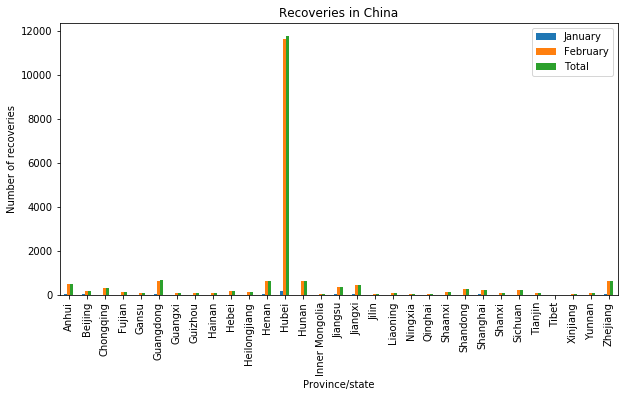

In [8]:
grouped_city = china_df.groupby(["Province/State"])["January","February","Total"].sum()
grouped_city
multi_plot = grouped_city.plot(kind="bar", figsize=(10,5)) 
plt.xlabel("Province/state")
plt.ylabel("Number of recoveries")
plt.title("Recoveries in China")


In [9]:
without_hubei = china_df.loc[china_df["Province/State"] != "Hubei"]


C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Recoveries in China')

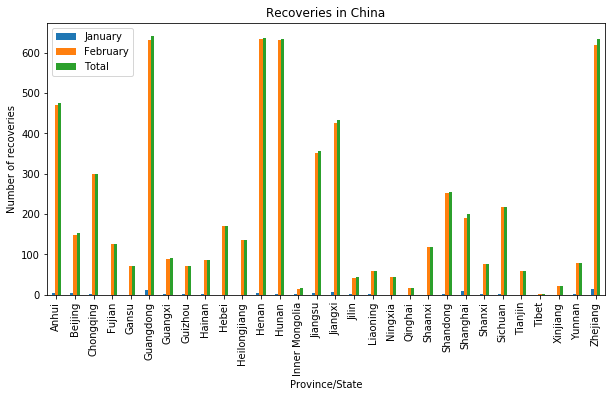

In [49]:
grouped_hubei = without_hubei.groupby(["Province/State"])["January","February","Total"].sum()
grouped_hubei
multi_plot = grouped_hubei.plot(kind="bar", figsize=(10,5)) 
plt.xlabel("Province/State")
plt.ylabel("Number of recoveries")
plt.title("Recoveries in China")

In [11]:
china_df.columns
china_reduced = china_df[['Province/State','Lat','Long', 'Total']]
china_reduced['Population'] = ''
china_reduced = china_reduced.sort_values('Total', ascending=False)
china_reduced

china_top_5 = china_reduced.head()
china_top_5

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Province/State,Lat,Long,Total,Population
12,Hubei,30.97564,112.2707,11788,
5,Guangdong,23.33841,113.4220,642,
11,Henan,33.88202,113.6140,637,
13,Hunan,27.61041,111.7088,634,
30,Zhejiang,29.18251,120.0985,633,


In [25]:
city_population = [58500000,113460000,94000000,67370000,57370000]
china_top_5['Population'] = np.array(city_population)
china_top_5 = china_top_5.rename(columns ={"Total": "Total Number of Recoveries"})

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
data_file = "data/time_series_covid_19_confirmed.csv"
confirm_df = pd.read_csv(data_file)
confchina_df = confirm_df.loc[(recover_df["Country/Region"] == "Mainland China"), :]

In [33]:
confchina_df["Total Confirmed Cases"] = confchina_df["2/20/20"]

C:\Users\amach\AppData\Local\Continuum\anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
confchina_df = confchina_df[['Province/State','Total Confirmed Cases']]
confchina_df = confchina_df.sort_values('Total Confirmed Cases', ascending=False)

china_analysis = pd.merge(china_top_5,confchina_df, on = 'Province/State', how = "inner")

In [45]:
china_analysis 

,Province/State,Lat,Long,Total Number of Recoveries,Population,Total Confirmed Cases
0,Hubei,30.97564,112.2707,11788,58500000,62442
1,Guangdong,23.33841,113.4220,642,113460000,1332
2,Henan,33.88202,113.6140,637,94000000,1265
3,Hunan,27.61041,111.7088,634,67370000,1010
4,Zhejiang,29.18251,120.0985,633,57370000,1175


In [47]:
china_analysis["Percentage Recovery(%)"] = round(((china_analysis["Total Number of Recoveries"]/china_analysis["Total Confirmed Cases"]) * 100),2)

In [48]:
china_analysis

,Province/State,Lat,Long,Total Number of Recoveries,Population,Total Confirmed Cases,Percentage Recovery(%)
0,Hubei,30.97564,112.2707,11788,58500000,62442,18.88
1,Guangdong,23.33841,113.4220,642,113460000,1332,48.20
2,Henan,33.88202,113.6140,637,94000000,1265,50.36
3,Hunan,27.61041,111.7088,634,67370000,1010,62.77
4,Zhejiang,29.18251,120.0985,633,57370000,1175,53.87
